In [5]:
import os
import pickle
import glob

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option('display.max_colwidth', int(1e3))

sns.set_palette(sns.color_palette("hls", 8))

plt.rcParams["figure.figsize"] = [24, 16]

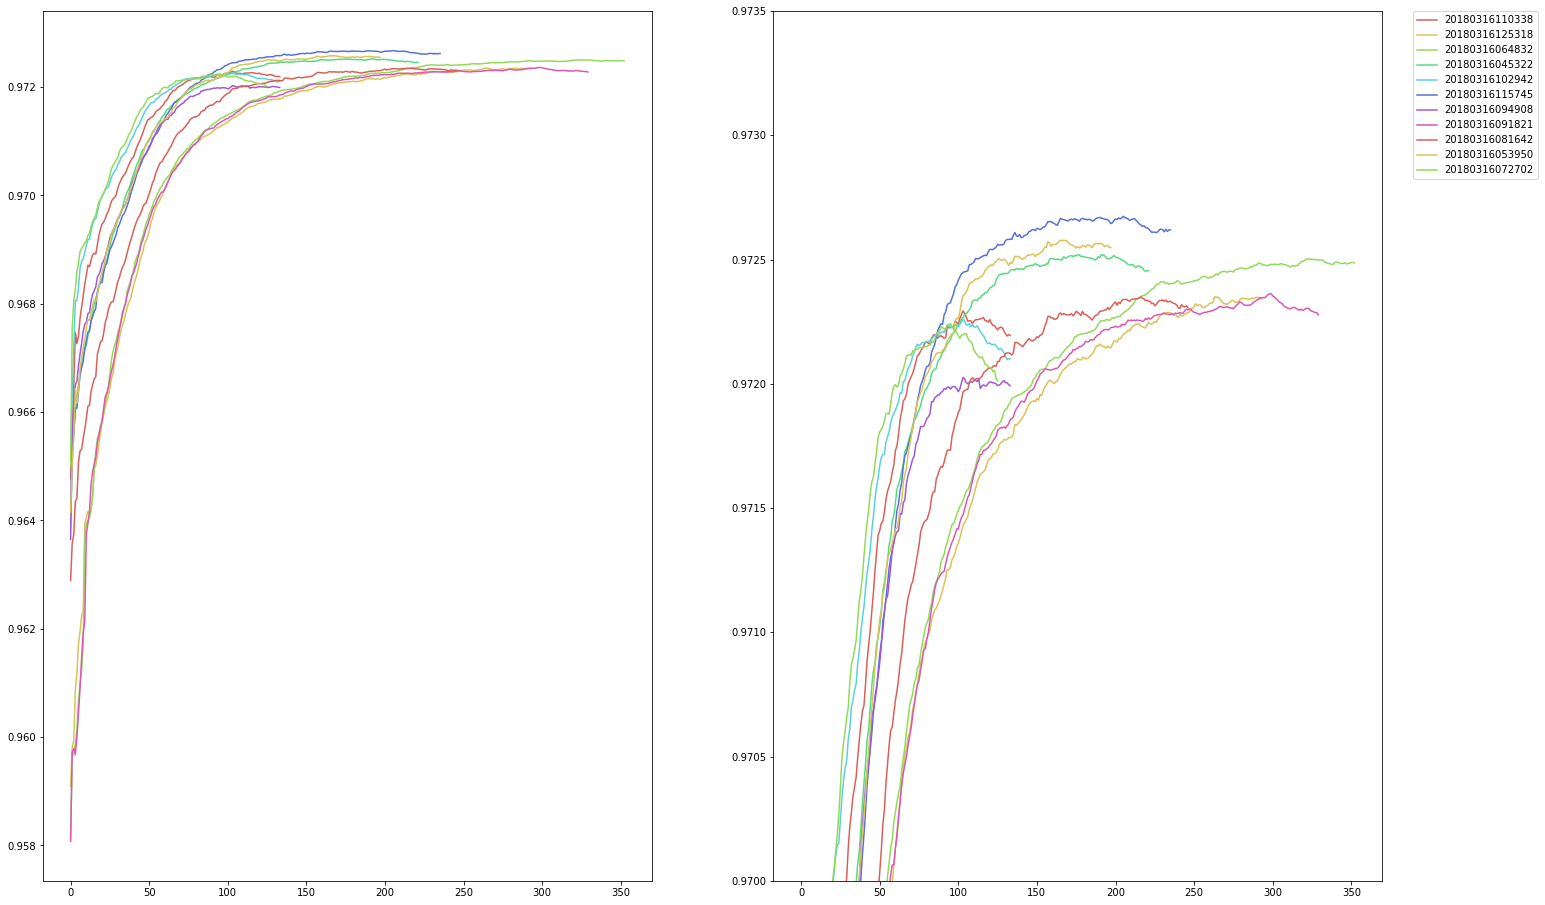

In [13]:
def plot_runs(path):
    summary = []

    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    plt.ylim((0.970, 0.9735))


    for fname in glob.glob(path):
        base_fname, _ = os.path.splitext(fname)
        _, _, eid = base_fname.split('-')
        with open(fname, 'rb') as f:
            m, evals_result, params = pickle.load(f)
        best_iter = m.best_iteration
        best_auc = evals_result['valid']['auc'][best_iter]
        summary.append([eid, best_auc, params])
        axes[0].plot(evals_result['valid']['auc'], label=eid)
        axes[1].plot(evals_result['valid']['auc'], label=eid)

    summary = pd.DataFrame(summary, columns=['eid', 'auc', 'params'])    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    summary = summary.sort_values(by='auc',ascending=False)
    return summary


summary = plot_runs('run1/cv-*pkl')

In [16]:
summary

,eid,auc,params
5,20180316115745,0.972668,"{'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7000000000000001, 'learning_rate': 0.1, 'max_depth': 7, 'scale_pos_weight': 300, 'num_leaves': 128}"
9,20180316053950,0.972576,"{'bagging_fraction': 0.7000000000000001, 'bagging_freq': 2, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'scale_pos_weight': 300, 'num_leaves': 128}"
3,20180316045322,0.972518,"{'bagging_fraction': 1.0, 'bagging_freq': 4, 'feature_fraction': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'scale_pos_weight': 300, 'num_leaves': 128}"
2,20180316064832,0.972502,"{'bagging_fraction': 0.8, 'bagging_freq': 4, 'feature_fraction': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'scale_pos_weight': 300, 'num_leaves': 32}"
7,20180316091821,0.972354,"{'bagging_fraction': 0.7000000000000001, 'bagging_freq': 4, 'feature_fraction': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'scale_pos_weight': 300, 'num_leaves': 32}"
1,20180316125318,0.972348,"{'bagging_fraction': 0.6000000000000001, 'bagging_freq': 2, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'scale_pos_weight': 300, 'num_leaves': 32}"
8,20180316081642,0.972344,"{'bagging_fraction': 0.5, 'bagging_freq': 2, 'feature_fraction': 0.7000000000000001, 'learning_rate': 0.1, 'max_depth': 6, 'scale_pos_weight': 300, 'num_leaves': 64}"
0,20180316110338,0.972284,"{'bagging_fraction': 0.6000000000000001, 'bagging_freq': 3, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'scale_pos_weight': 300, 'num_leaves': 256}"
4,20180316102942,0.972254,"{'bagging_fraction': 0.9, 'bagging_freq': 3, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'scale_pos_weight': 300, 'num_leaves': 512}"
10,20180316072702,0.972229,"{'bagging_fraction': 0.9, 'bagging_freq': 3, 'feature_fraction': 0.9, 'learning_rate': 0.1, 'max_depth': 9, 'scale_pos_weight': 300, 'num_leaves': 512}"


,eid,auc,params
1,20180317041541,0.973360,"{'bagging_fraction': 1.0, 'bagging_freq': 2, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_data_in_leaf': 2500, 'scale_pos_weight': 300, 'num_leaves': 128}"
2,20180317032436,0.973345,"{'bagging_fraction': 1.0, 'bagging_freq': 4, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_data_in_leaf': 5000, 'scale_pos_weight': 300, 'num_leaves': 128}"
3,20180317014032,0.973320,"{'bagging_fraction': 0.9, 'bagging_freq': 3, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_data_in_leaf': 1500, 'scale_pos_weight': 300, 'num_leaves': 128}"
7,20180316185508,0.973298,"{'learning_rate': 0.1, 'num_leaves': 128, 'max_depth': 7, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7, 'scale_pos_weight': 300}"
4,20180316230454,0.973268,"{'bagging_fraction': 1.0, 'bagging_freq': 1, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_data_in_leaf': 1500, 'scale_pos_weight': 300, 'num_leaves': 128}"
0,20180317023410,0.973236,"{'bagging_fraction': 0.9, 'bagging_freq': 2, 'feature_fraction': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'min_data_in_leaf': 5000, 'scale_pos_weight': 300, 'num_leaves': 128}"
5,20180316235545,0.973197,"{'bagging_fraction': 0.7000000000000001, 'bagging_freq': 4, 'feature_fraction': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_data_in_leaf': 2500, 'scale_pos_weight': 300, 'num_leaves': 128}"
6,20180317004626,0.972919,"{'bagging_fraction': 0.6000000000000001, 'bagging_freq': 2, 'feature_fraction': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'min_data_in_leaf': 500, 'scale_pos_weight': 300, 'num_leaves': 128}"


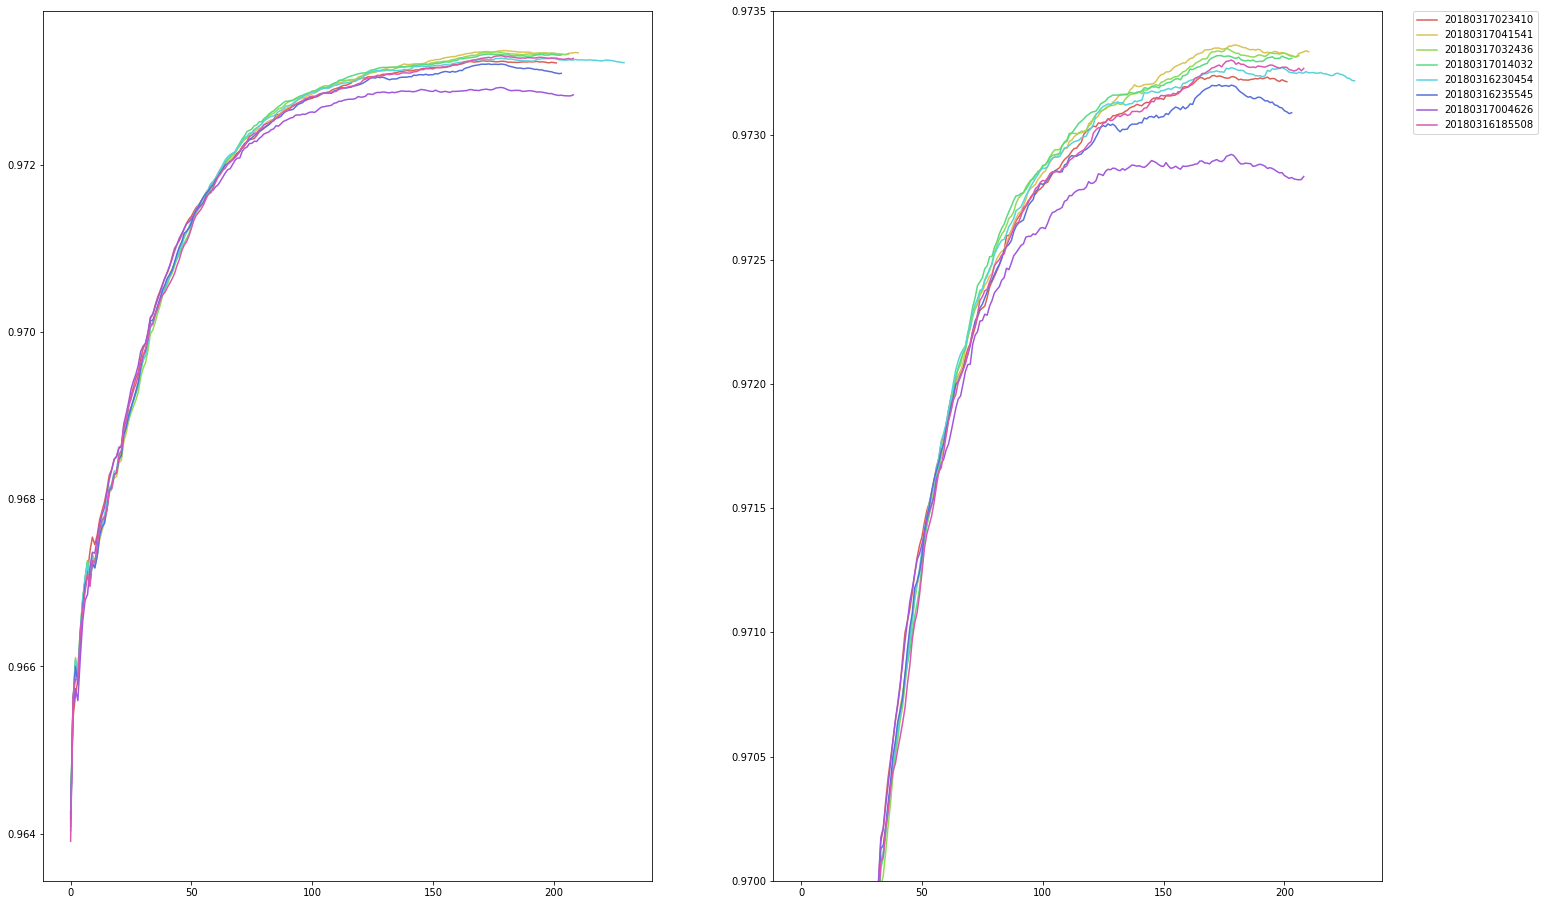

In [15]:
plot_runs('run2/cv*pkl')